<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/ai03_sc12x_%EB%B0%B1%EA%B2%BD%EB%A0%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# SC12x

## Statistical Analysis

## 개요

여러분은 코스 수료를 마치고 CodeStates에 DS CA (Coaching  Assistant)로 합류했습니다.

여러분에게 주어진 메인 태스크는 세션 및 수강생 핸들링이지만. 

시간을 짜내어 사이드 프로젝트를 하고 싶어졌습니다.

AIB 팀원들과의 커피타임을 통해 수강생 데이터를 하나 받을 수 있었습니다.

> 기수별 학생들 성취도 데이터인데, 어떤 의미가 있는지 확인해주세요.

### Data Description

- F1 : `N`, `D`
- F2 : `Y`, `N`
- F3 : `A`, `B`, `C`, `D` (기수)
- F4 : Continuous
- F5 : Continuous
- F6 : `A` ~ `H`
- F7 : Continuous
- F8 : `X`, `Y`, `Z`
- F9 : `Y`, `N`

## 1. 다음 링크를 참조하여 데이터를 불러오세요. 

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv>

이후 간단한 전처리를 하세요.


In [4]:
import pandas as pd

df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   F1          200 non-null    object 
 2   F2          191 non-null    object 
 3   F3          200 non-null    object 
 4   F4          200 non-null    float64
 5   F5          170 non-null    float64
 6   F6          200 non-null    object 
 7   F7          197 non-null    float64
 8   F8          200 non-null    object 
 9   F9          200 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 15.8+ KB


In [ ]:
# F2, F5, F7 결측치 확인.
df.isnull

In [1]:
import pandas as pd
df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv")
# 데이터에 소문자, NA가 섞여 있음. 결측값이 있는 데이터를 제거 하느냐, 보간 하느냐.

# 결측값 drop (제거)
df = df.dropna()

# 결측값 ''로 대체
# df = df.fillna(value = '')


# 소문자 -> 대문자
def upper_case(string):
  return string.upper()
for i in ['F1', 'F2', 'F3', 'F6', 'F8', 'F9']:
  df[i] = df[i].apply(upper_case)
df


,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
1,2,D,N,A,1.608900,0.133612,H,3.0,X,Y
2,3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
3,4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
4,5,N,N,A,1.532721,0.283534,E,4.0,Z,Y
...,...,...,...,...,...,...,...,...,...,...
195,196,N,N,D,2.765327,0.753814,G,5.0,X,Y
196,197,N,Y,D,3.098499,0.637145,G,2.0,Y,Y
197,198,N,N,D,1.613861,0.882830,F,2.0,Z,Y
198,199,N,N,D,3.003789,0.892767,G,4.0,Z,Y


## 2. **F3**에 따라서 다른 Feature들이 어떤 경향을 나타내는지 해석해보세요.

- categorical feature의 경우 crosstab을 사용하여 [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)과 chi-square를 시도해 볼 수 있습니다.

- continuous feature의 경우 여러 시각화와 t-test를 할 수 있을 겁니다.

- 이를 바탕으로 **가장 유의미한** 그리고 **가장 무의미한** feature를 찾아보세요.

여기서 여러분들의 목표는 

`F3`에 따라서 다른 feature들이 영향이 있는지 없는지를 알아보는 

**가설검정** 입니다.

따라서 데이터 탐색 및 시각화 작업에 너무 많은 시간을 쏟지 마세요. 이것은 사이드 프로젝트 입니다.

F3과 F7의 T-test statistic = -0.10525336685582157 p-value = 0.5417792239576368 따라서 귀무가설 채택, F3의 A가 B보다 F7이 더 크다는 유의미한 결과가 나오지 않는다.
F3에 대해서 다른 Feature 들에 관한 카이 제곱 테스트 결과 statistic = 0.40422922117756616, p-value = 0.9988165625307686, 따라서 귀무가설 채택, F3에 대해서 다른 Feature들이 영향이 있다는 유의미한 결과가 나오지 않는다.
F3,F4의 p-value = [0.89512559], F3,F5의 p-value = [0.99996509], F3,F7의 p-value = [0.99998592]
F3과 F4, F5, F7 중 제일 유의미한 Feature는 F4이고, 제일 무의미한 Feature는 F7이다.


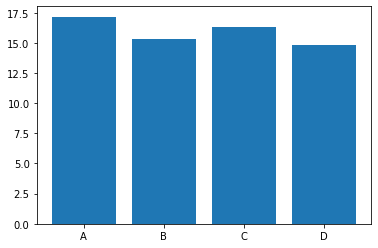

In [2]:
# 이 곳에 답안을 작성하시기 바랍니다
# !sudo pip3 install --upgrade scipy
import numpy as np
from scipy.stats import chisquare
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df_F7 = pd.crosstab(index = df.F3, columns = df.F7)
df_F4 = pd.crosstab(index = df.F3, columns = df.F4)
df_F5 = pd.crosstab(index = df.F3, columns = df.F5)

A_sum = 0
for i, j in zip(df_F7.loc['A'], df_F7.columns):
  A_sum += i*j

B_sum = 0
for i, j in zip(df_F7.loc['B'], df_F7.columns):
  B_sum += i*j

C_sum = 0
for i, j in zip(df_F7.loc['C'], df_F7.columns):
  C_sum += i*j

D_sum = 0
for i, j in zip(df_F7.loc['D'], df_F7.columns):
  D_sum += i*j

# F3의 F7 평균값 bar 그래프. 
plt.bar(x = df_F7.index, height = [A_sum/df_F7.shape[1], B_sum/df_F7.shape[1], C_sum/df_F7.shape[1], D_sum/df_F7.shape[1]]);

# F3에 대해서 F4, F5, F7은 영향이 있는가
df_F7_one = df_F7.sum(axis = 1)
chisquare(df_F7_one)

# df_F4_one = df_F4.sum(axis = 1)
# chisquare(df_F4_one)

# df_F5_one = df_F5.sum(axis = 1)
# chisquare(df_F5_one)

# print(chisquare(df_F7_one),chisquare(df_F4_one),chisquare(df_F5_one))

# chisquare(df[['F3', 'F7']].pivot_table ( index = 'F3' ))

# 가설 검정 T-test
# 귀무 가설 : F3 의 A가 B보다 F7이 더 크다는 유의미한 결과가 나오지 않는다. ( pvalue = 0.5418 > 0.05 , 귀무가설 채택 )
# 대안 가설 : F3 의 A가 B보다 F7이 더 크다는 유의미한 결과가 나온다. ( 대안가설 기각 )
df_A = df[df['F3'] == 'A']['F7']
df_B = df[df['F3'] == 'B']['F7']
print('F3과 F7의 T-test statistic =', stats.ttest_ind(df_A, df_B, alternative = 'greater')[0], 'p-value =', stats.ttest_ind(df_A, df_B, alternative = 'greater')[1], '따라서 귀무가설 채택, F3의 A가 B보다 F7이 더 크다는 유의미한 결과가 나오지 않는다.')

# 가설 검정 two-sample chi-square test
# 귀무 가설 : F3에 대해서 F4, F5, F7이 연관이 있다는 유의미한 결과가 나오지 않는다. ( p-value = 0.999 > 0.05 , 귀무가설 채택, 거의 연관이 없다.)
# 대안 가설 : F3에 대해서 F4, F5, F7이 연관이 있다는 유의미한 결과가 나온다. ( 대안가설 기각 )
df_chi = df[['F3', 'F4', 'F5', 'F7']].dropna()
df_chi = df_chi.pivot_table ( index = 'F3' )
chi_test = chi2_contingency(df_chi)
print('F3에 대해서 다른 Feature 들에 관한 카이 제곱 테스트 결과 statistic = {}, p-value = {}, 따라서 귀무가설 채택, F3에 대해서 다른 Feature들이 영향이 있다는 유의미한 결과가 나오지 않는다.'.format(chi_test[0], chi_test[1]))

# F3과 가장 유의미한 결과가 나오는 Feature 찾기
df_chi1 = df[['F3', 'F4']].dropna()
df_chi1 = df_chi1.pivot_table ( index = 'F3' )
chi_test1 = chisquare(df_chi1)

df_chi2 = df[['F3', 'F5']].dropna()
df_chi2 = df_chi2.pivot_table ( index = 'F3' )
chi_test2 = chisquare(df_chi2)

df_chi3 = df[['F3', 'F7']].dropna()
df_chi3 = df_chi3.pivot_table ( index = 'F3' )
chi_test3 = chisquare(df_chi3)

print('F3,F4의 p-value = {}, F3,F5의 p-value = {}, F3,F7의 p-value = {}'.format(chi_test1[1], chi_test2[1], chi_test3[1]))
print('F3과 F4, F5, F7 중 제일 유의미한 Feature는 F4이고, 제일 무의미한 Feature는 F7이다.')

## 3. 분석한 내용들을 설명하는 리포트를 작성해보세요. 

분석의 끝은 결국 설명입니다.

통계 분석에 대한 이해도가 적은 다른 크루들이 이해 할 수 있도록 

분석한 내용들을 설명하는 리포트를 작성해보세요. 

필요한 경우 코드 / 텍스트 내용을 더 추가해도 좋습니다.

In [3]:
# 이 곳에 답안을 작성하시기 바랍니다
# 우선 우리가 받은 데이터 내에 결측값이 있었고, 그 결측값이 있는 데이터를 제거 함으로써 결측값을 처리 했습니다.
'''
결측값 제거
df = df.dropna()
'''
# 결측값을 다 제거 하고 난 후의 데이터 형태는 158 rows × 10 columns 이었습니다.
# 이 내부 데이터 안에 소문자와 대문자가 섞여 있어 모든 소문자를 대문자로 전환 하였습니다.
'''
소문자를 대문자로 전환
def upper_case(string):
  return string.upper()
for i in ['F1', 'F2', 'F3', 'F6', 'F8', 'F9']:
  df[i] = df[i].apply(upper_case)
'''
# 이 데이터를 통해서 가설 검정을 하기 위해 숫자화 되어 있는 Feature는 F4, F5, F7 이었고, 이를 F3에 대하여 가설검정을 설계하였습니다.
# 가설 검정으로 F3과 Feature에 대해서 카이제곱검정을 실행하였으며,
# 귀무가설은 F3에 대해서 Feature가 유의미한 관계가 없다.
# 대안가설은 F3에 대해서 Featrue가 유의미한 관계가 있다. 로 가정 하고 가설검정을 시작하였습니다.
# 카이제곱테스트 결과로는 statistic : 0.4042 , p-value : 0.9988 로 나왔고,
# 귀무가설이 채택 되기 위해서는 p-value가 0.05 이상이 나와야 하고, 대안가설이 채택 되기 위해서는 p-value가 0.05 이하가 나와야 합니다.
# 이 테스트 결과의 p-value는 0.9988이 나왔고, p-value의 값이 0.05 보다 크므로 귀무가설이 채택 되었습니다.

# 추가로 F3과 가장 유의미한 결과가 나온 Feature와 무의미한 결과가 나온 Feature를 찾기 위해 아래와 같은 코드를 사용 하였습니다.
'''
F3과 가장 유의미한 결과가 나오는 Feature 찾기
df_chi1 = df[['F3', 'F4']].dropna()
df_chi1 = df_chi1.pivot_table ( index = 'F3' )
chi_test1 = chisquare(df_chi1)

df_chi2 = df[['F3', 'F5']].dropna()
df_chi2 = df_chi2.pivot_table ( index = 'F3' )
chi_test2 = chisquare(df_chi2)

df_chi3 = df[['F3', 'F7']].dropna()
df_chi3 = df_chi3.pivot_table ( index = 'F3' )
chi_test3 = chisquare(df_chi3)
'''
# 각 Feature 들의 F3과의 관계에 대해서 p-value를 구하였습니다.
# 그 결과로 F3,F4의 p-value = [0.89512559], F3,F5의 p-value = [0.99996509], F3,F7의 p-value = [0.99998592] 가 나왔으며, p-value가 낮을수록 F3과 연관이 있다고 설명 할수 있습니다.
# 이 결과 데이터에 따르면, F3과 F4의 p-value 값이 그나마 가장 낮으므로 F4, F5, F7 중에서는 F4가 가장 유의미한 결과가 나왔다고 말할 수 있습니다.
# 반대로 가장 높은 p-value를 가진 F3과 F7의 경우에는 F7이 F3에 대해서 가장 무의미한 결과라고 말할 수 있습니다.

# crosstab을 이용한 시각화로는 F3과 F7에 대해서 bar 그래프를 그려보았고,

# 가설 검정 T-test로는 귀무 가설을 'F3 의 A가 B보다 F7이 더 크다는 유의미한 결과가 나오지 않는다.' 로 가정 하였고, 대안 가설을 'F3 의 A가 B보다 F7이 더 크다는 유의미한 결과가 나온다.' 로 가정 하였습니다.
# F3과 F7의 T-test 결과로는 statistic이 -0.1053이 나왔고, p-value는 0.5418이 나왔습니다. T-test도 마찬가지로 p-value가 0.05 이상이면 귀무가설이 채택되고, 0.05이하 이여야 대안 가설을 채택 합니다.
# p-value는 0.5418이 나왔고 따라서 귀무가설 채택 되었습니다. 
# F3의 A가 B보다 F7이 더 크다는 유의미한 결과가 나오지 않는다. 라는 결론이 나왔습니다.

"\nF3과 가장 유의미한 결과가 나오는 Feature 찾기\ndf_chi1 = df[['F3', 'F4']].dropna()\ndf_chi1 = df_chi1.pivot_table ( index = 'F3' )\nchi_test1 = chisquare(df_chi1)\n\ndf_chi2 = df[['F3', 'F5']].dropna()\ndf_chi2 = df_chi2.pivot_table ( index = 'F3' )\nchi_test2 = chisquare(df_chi2)\n\ndf_chi3 = df[['F3', 'F7']].dropna()\ndf_chi3 = df_chi3.pivot_table ( index = 'F3' )\nchi_test3 = chisquare(df_chi3)\n"

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하고, 시간이 남았다면 아래 내용을 충족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들 중 하나의 요구사항만 충족하면 되며, 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- Numerical 데이터에 대해서 normalize를 한 다음, 위에서 진행 했었던 분석을 다시 시행해보세요. (F4, F5, F7 vs F3)

- Categorical 데이터를 one-hot encoding을 통해서 numerical 로 변환 후, 위에서 진행 했었던 분석을 다시 시행해보세요. (F1, F2, F6, F8, F9 vs F3)

In [4]:
# 이 곳에 답안을 작성하시기 바랍니다